In [102]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline
kkk = 1

In [103]:
def g(x):
    return np.e**(-2*np.sin(2*x)) + 2*np.cos(2*x)
a = -np.pi
b = 2 * np.pi

In [104]:
def fun_painter(a, b, func, names, points = None, title=None):
    global kkk
    plt.figure()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    for i in range(len(func)):
        x = np.linspace(a, b, 1000)
        y = func[i](x)
        plt.plot(x, y, label=names[i])
    plt.legend()
    if title is not None:
        plt.title(title)
    if points is not None:
        plt.plot(points[0], points[1], marker='o', linestyle='')
    name = "obrazek" + str(kkk) + ".png"
    plt.savefig(name,bbox_inches='tight')
    kkk+=1
    plt.show()

In [105]:
def generate_regular(a, b, f, n):
    x = np.linspace(a, b, n)
    y = f(x)
    return x, y

thousand_test_points = np.linspace(a, b, 1000) 

In [106]:
def generate_chebyshev(a, b, f, n):
    x = []
    for k in range(n, 0, -1):
        x.append(.5*(a+b) + .5*(b-a)*np.cos((2*k-1)*np.pi/(2*n)))
    x = np.array(x)
    y = f(x)
    return x, y

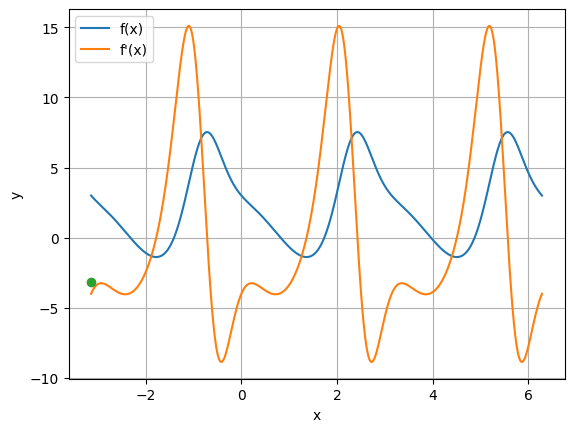

In [107]:
x = sp.symbols('x')

f = sp.exp(-2*sp.sin(2*x)) + 2*sp.cos(2*x)

f_prime = sp.diff(f, x)

g1 = sp.lambdify(x, f_prime)

fun_painter(a,b,[g, g1],["f(x)","f'(x)"],thousand_test_points)

In [108]:
def hermit(xs, ys, g_):
    l = len(xs) * 2
    f_arr = []
    for ik in range(len(xs)):
        for j in range(2):
            f_arr.append([(ys[ik],xs[ik])])
    for i in range(1, l):
        c = 1
        for j in range(1, i+1):
            if f_arr[i][0][1] != f_arr[i-j][0][1]:
                f_arr[i].append(((f_arr[i][j-1][0] - f_arr[i-1][j-1][0]) / (f_arr[i][0][1] - f_arr[i-j][0][1]), f_arr[i][0][1]))
            else:
                f_arr[i].append((g_(f_arr[i][0][1])/math.factorial(c), f_arr[i][0][1]))
                c += 1
    def fun_x(xr):
        y = 0
        for io in range(len(xs)):
            for jo in range(2):
                z = f_arr[2 * io + jo][2 * io + jo][0]
                for lp in range(io):
                    z *= (xr - xs[lp]) ** 2
                z *= (xr - xs[io]) ** jo
                y += z
        return y
    return fun_x

In [109]:
def max_diff(p, f=g, points=thousand_test_points):
    res = 0
    for i in points:
        res = max(res, abs(f(i) - p(i)))
    return res

In [110]:
def sum_diff(p, f=g, points=thousand_test_points):
    res = 0
    for i in points:
        res += (f(i) - p(i)) ** 2
    return res / len(points)

In [111]:
def generate_summary(n):
    pr = generate_regular(a, b, g, n)
    f_h = hermit(*pr, g1)
    fun_painter(a, b, [f_h, g], ["Hermit", "f(x)"], pr, "Równomiernie rozmieszczone węzły" )
    print("------------------------------RÓWNOLEGŁE------------------------------")
    print("Maksymalna różnica hermit: ", max_diff(f_h))
    print("Błąd średni kwadratowy hermit: ", sum_diff(f_h))
    print("----------------------------------------------------------------------")

    pc = generate_chebyshev(a, b, g, n)
    f_h = hermit(*pc, g1)
    fun_painter(a, b, [f_h, g], ["Hermit", "f(x)"], pc, "Węzły rozmieszczone zgodnie z zerami wielomianu Czebyszewa")
    print("------------------------------CZEBYSZEW------------------------------")
    print("Maksymalna różnica hermit: ", max_diff(f_h))
    print("Błąd średni kwadratowy hermit: ", sum_diff(f_h))
    print("----------------------------------------------------------------------")

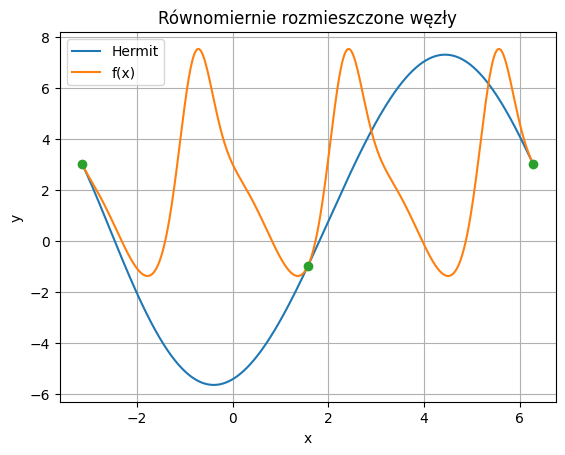

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica hermit:  13.039221806700855
Błąd średni kwadratowy hermit:  31.093052941531624
----------------------------------------------------------------------


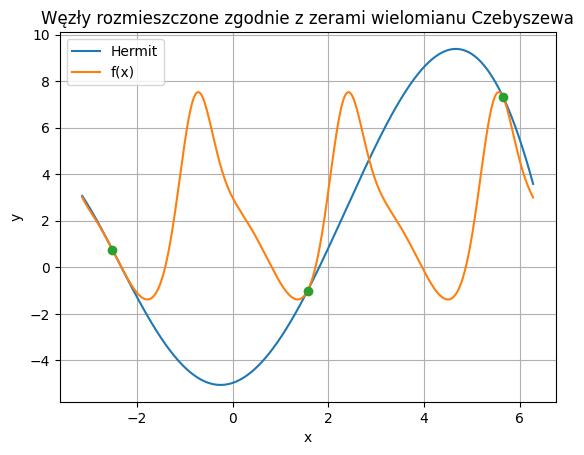

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica hermit:  12.295087294274012
Błąd średni kwadratowy hermit:  33.91708169102011
----------------------------------------------------------------------


In [112]:
generate_summary(3)

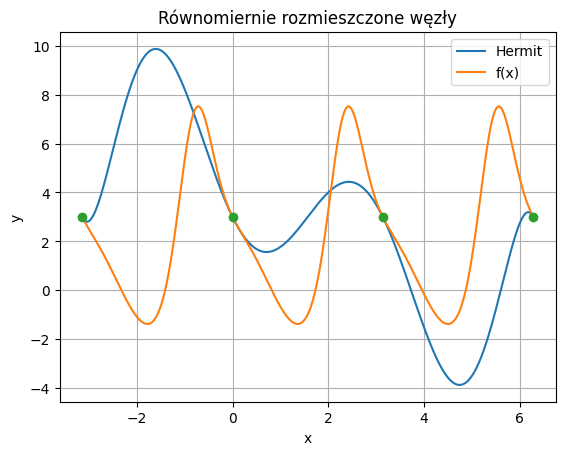

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica hermit:  11.162873578100978
Błąd średni kwadratowy hermit:  20.092631028460424
----------------------------------------------------------------------


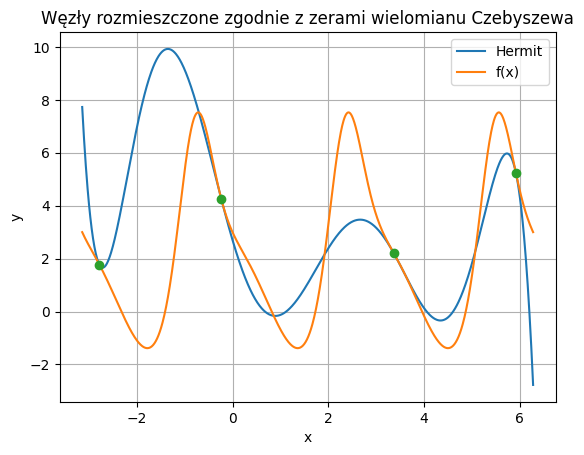

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica hermit:  10.582847475321254
Błąd średni kwadratowy hermit:  12.075734517736521
----------------------------------------------------------------------


In [113]:
generate_summary(4)

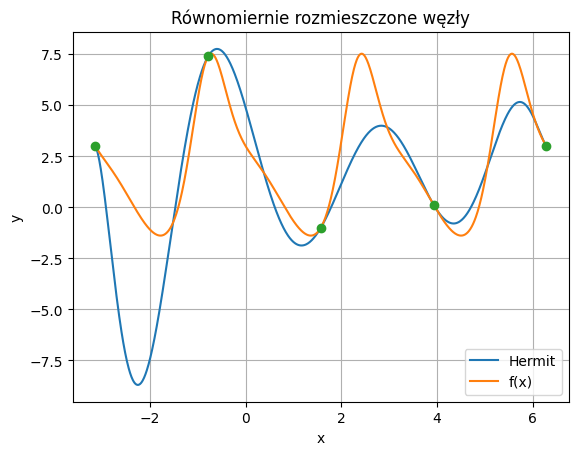

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica hermit:  8.601023312831462
Błąd średni kwadratowy hermit:  7.464246116213026
----------------------------------------------------------------------


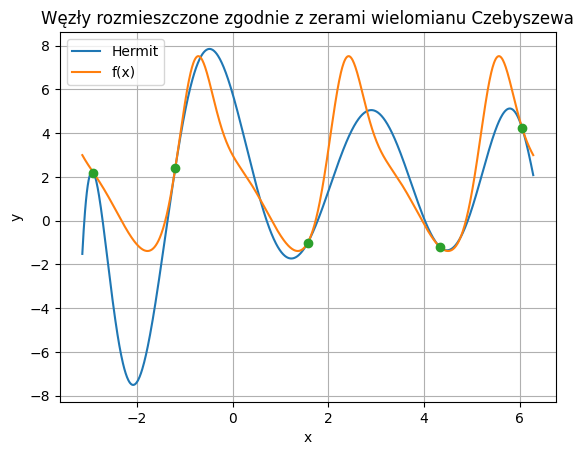

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica hermit:  6.758748184177296
Błąd średni kwadratowy hermit:  5.436193875773504
----------------------------------------------------------------------


In [114]:
generate_summary(5)

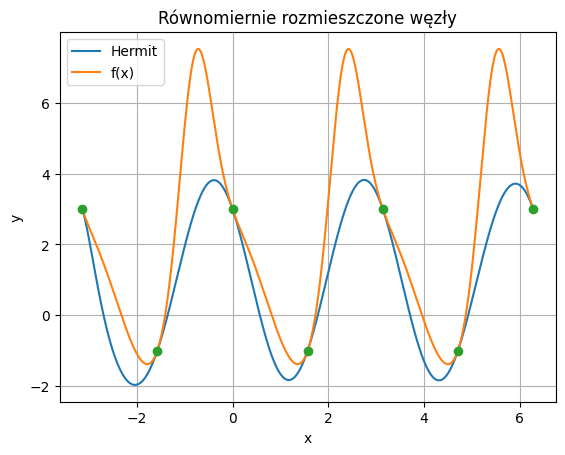

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica hermit:  4.5045219207215315
Błąd średni kwadratowy hermit:  3.588976920929562
----------------------------------------------------------------------


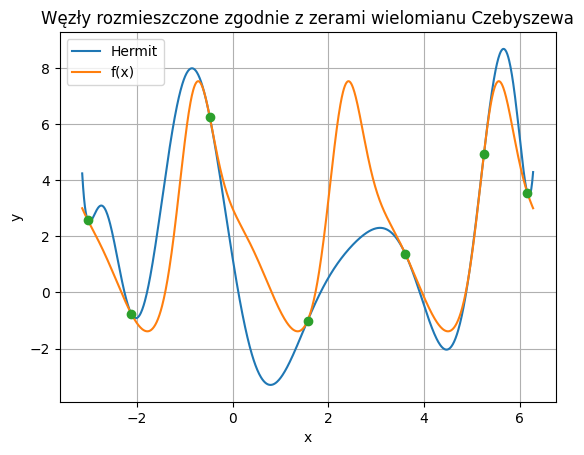

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica hermit:  6.027442504238194
Błąd średni kwadratowy hermit:  4.789785617246491
----------------------------------------------------------------------


In [115]:
generate_summary(7)

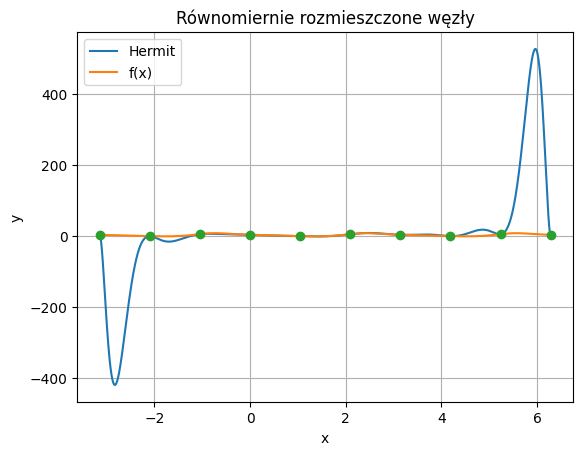

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica hermit:  522.4823629510852
Błąd średni kwadratowy hermit:  16448.683903891968
----------------------------------------------------------------------


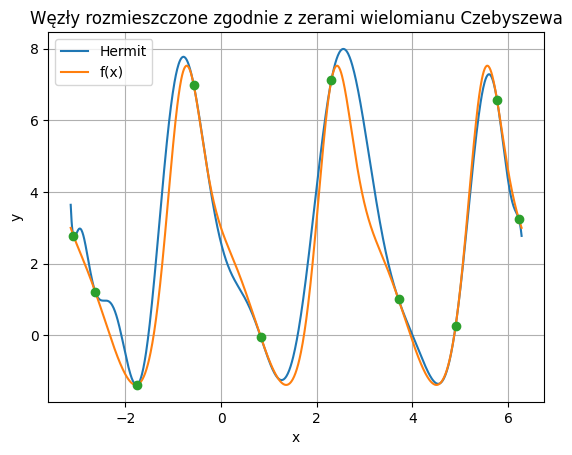

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica hermit:  2.2837075983778226
Błąd średni kwadratowy hermit:  0.5989220429477424
----------------------------------------------------------------------


In [116]:
generate_summary(10)

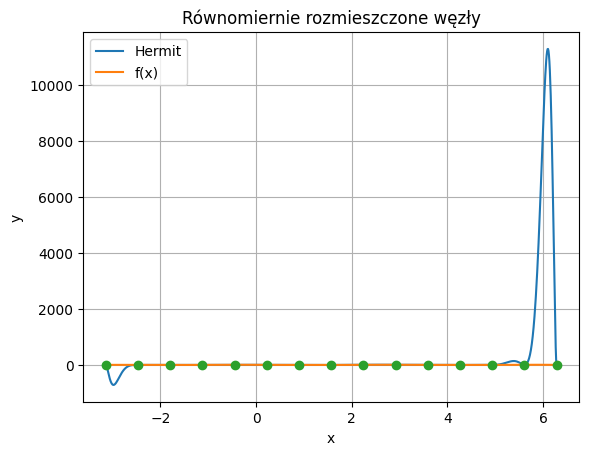

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica hermit:  11272.167343384524
Błąd średni kwadratowy hermit:  2770870.2272818037
----------------------------------------------------------------------


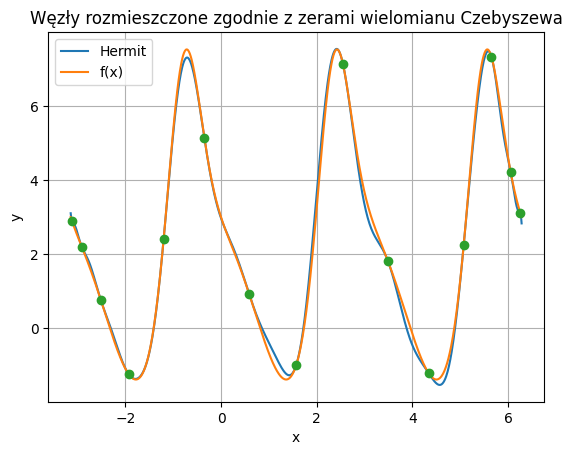

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica hermit:  0.404647378670973
Błąd średni kwadratowy hermit:  0.02431854494377304
----------------------------------------------------------------------


In [117]:
generate_summary(15)

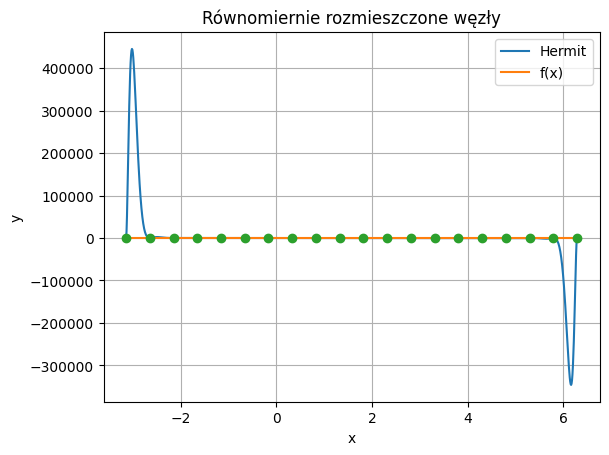

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica hermit:  445435.6168432821
Błąd średni kwadratowy hermit:  4781364106.34861
----------------------------------------------------------------------


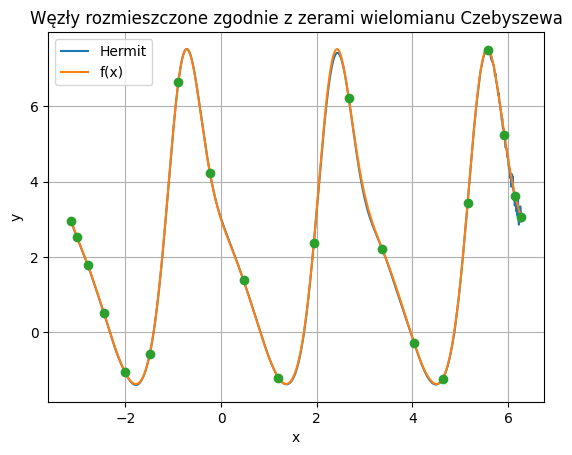

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica hermit:  0.38626778551509444
Błąd średni kwadratowy hermit:  0.002085340951845285
----------------------------------------------------------------------


In [118]:
generate_summary(20)

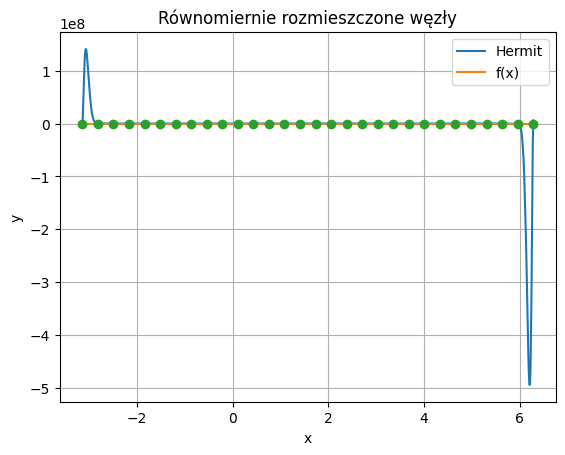

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica hermit:  495105853.37386745
Błąd średni kwadratowy hermit:  2449063198170216.0
----------------------------------------------------------------------


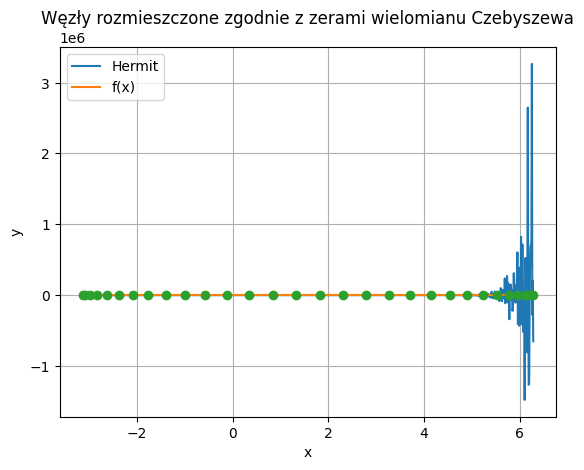

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica hermit:  3264127.1527725034
Błąd średni kwadratowy hermit:  30051906096.055134
----------------------------------------------------------------------


In [119]:
generate_summary(30)

In [122]:
max_h = 100
n_h = 3
for i in range(3,101):
    pc = generate_chebyshev(a, b, g, i)
    f_h = hermit(*pc, g1)
    temp_l = max_diff(f_h)
    if temp_l < max_h:
        max_h = temp_l
        n_h = i

print("Najmniejsza maksymalna różnica dla wielomianu Hermite'a: ", max_h, " dla n = ", n_h)

Najmniejsza maksymalna różnica dla wielomianu Hermite'a:  0.17716852306968534  dla n =  19


In [123]:
max_h = 100
n_h = 3
for i in range(3,101):
    pc = generate_regular(a, b, g, i)
    f_h = hermit(*pc, g1)
    temp_l = max_diff(f_h)
    if temp_l < max_h:
        max_h = temp_l
        n_h = i

print("Najmniejsza maksymalna różnica dla wielomianu Hermite'a: ", max_h, " dla n = ", n_h)

Najmniejsza maksymalna różnica dla wielomianu Hermite'a:  4.5045219207215315  dla n =  7


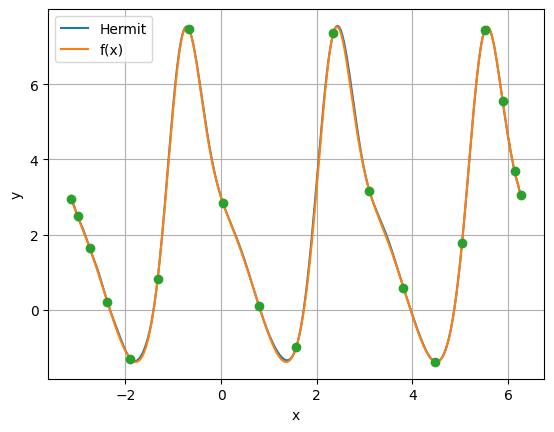

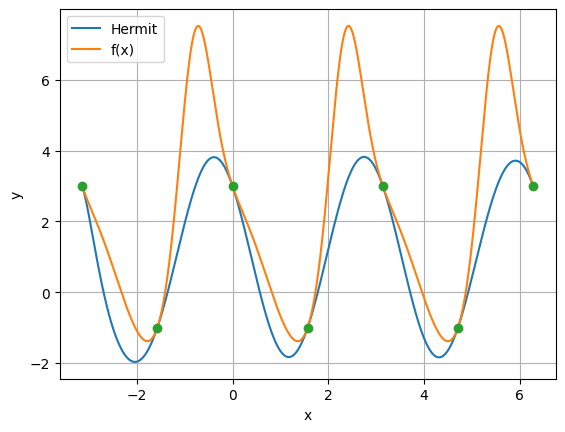

In [124]:
pc = generate_chebyshev(a, b, g, 19)
f_1 = hermit(*pc, g1)
fun_painter(a, b, [f_1, g], ["Hermit","f(x)"], pc)
pc = generate_regular(a, b, g, 7)
f_2 = hermit(*pc, g1)
fun_painter(a, b, [f_2, g], ["Hermit", "f(x)"], pc)

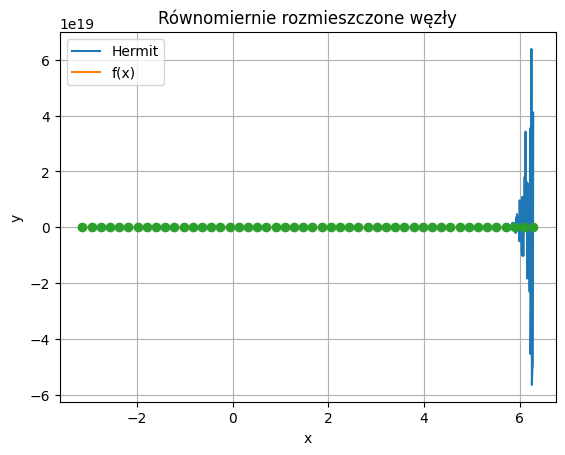

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica hermit:  6.386471782220344e+19
Błąd średni kwadratowy hermit:  2.223489479750785e+37
----------------------------------------------------------------------


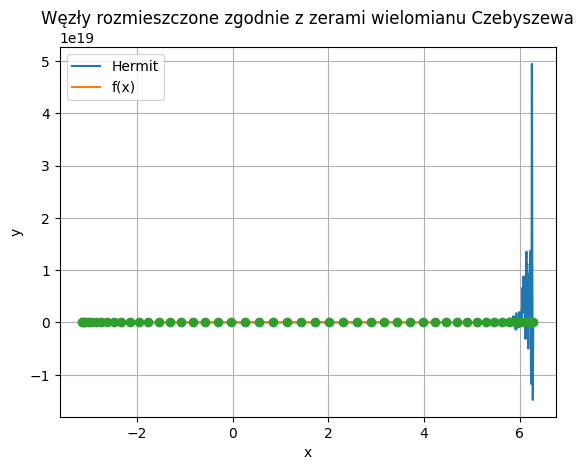

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica hermit:  4.945646336385633e+19
Błąd średni kwadratowy hermit:  4.333943674952682e+36
----------------------------------------------------------------------


In [125]:
generate_summary(50)

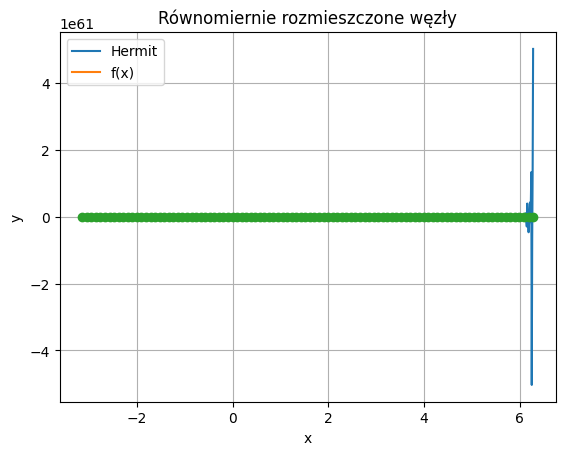

------------------------------RÓWNOLEGŁE------------------------------
Maksymalna różnica hermit:  5.0327182971033974e+61
Błąd średni kwadratowy hermit:  5.741362369641596e+120
----------------------------------------------------------------------


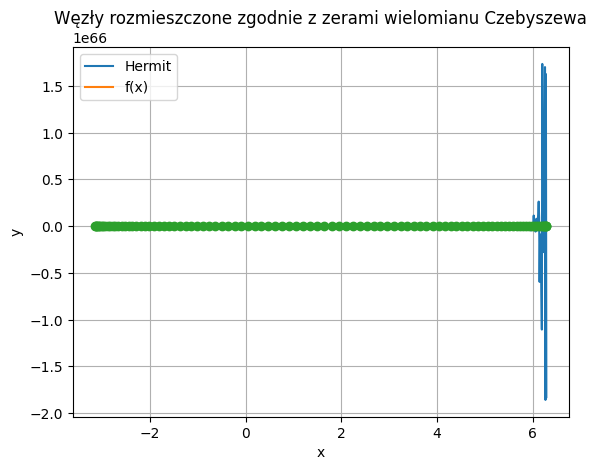

------------------------------CZEBYSZEW------------------------------
Maksymalna różnica hermit:  1.8584077556482063e+66
Błąd średni kwadratowy hermit:  1.9122920820718523e+130
----------------------------------------------------------------------


In [126]:
generate_summary(100)